## KING COUNTY HOUSING ANALYSIS

# Stakeholder: 
Real Estate companies in King County.

# Business Problem:
Real estate companies need information that would enable them offer home owners with advise on features to improve in their homes and the expected value increase that comes wit these improvements before they list their homes for sale. 

# Business Question: 
What are some of the features that a home seller need to improve in order to sell their homes at a higher value?

# Data Understanding
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder.The original dataset includes sales data for 21,597 homes with 20 different features, which include:

~date - Date house was sold

~price - Sale price (prediction target)

~bedrooms - Number of bedrooms

~bathrooms - Number of bathrooms

~sqft_living - Square footage of living space in the home

~sqft_lot - Square footage of the lot

~floors - Number of floors (levels) in house

~waterfront - Whether the house is on a waterfront

~view - Quality of view from house

~condition - How good the overall condition of the house is. Related to maintenance of house

~grade - Overall grade of the house. Related to the construction and design of the house

~sqft_above - Square footage of house apart from basement

~sqft_basement - Square footage of the basement

~yr_built - Year when house was built

~yr_renovated - Year when house was renovated

~zipcode - ZIP Code used by the United States Postal Service


### Data Preparation


### Data Cleaning and Processing

In [ ]:
#importing the necessary libraries required for this project
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

In [2]:
#importing and viewing the data
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#the number of rows and columns present in the data
data.shape

(21597, 21)

For this project we are trying to research and offer insights to home owners or real estate vendors on the feature reinnovation that would lead to a higher value estimation for their homes, therefore we can start by deleting the columns that we do not require

In [4]:
data.drop(columns= ["zipcode","lat","long","date","sqft_lot","sqft_living15","sqft_lot15"],inplace = True)

In [5]:
#entries and the columns that have missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 2.3+ MB


From the infromation above, we can see that three columns waterfront,yr_renovated and view have missing values as their etries are lower. 
We therefore have to look into ways to deal with the missing values.

## ASSESS THE TARGET VARIABLE "PRICE"

Skew is: 4.023364652271239


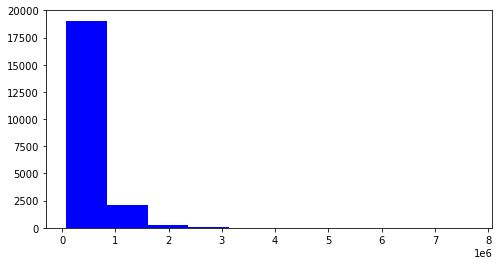

In [6]:
print("Skew is:",data.price.skew())
plt.figure(figsize=(8,4))
plt.hist(data.price, color='blue')
plt.show()

### using log tranfromations to reduce on the skewness

Skew is: 0.4310041773299232


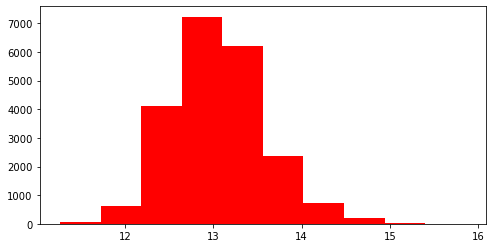

In [7]:
target = np.log(data.price)
print ("Skew is:", target.skew())
plt.figure(figsize=(8,4))
plt.hist(target, color='red')
plt.show()

Theres a possibility of existence of duplicates within the data set.
Inorder to check for duplicate values, lets consider the id column since its the unique identifier.

In [8]:
data["id"].duplicated().sum()

177

In [9]:
data.drop_duplicates(subset= 'id', keep= 'last', inplace= True)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0
1,6414100192,538000.0,3,2.25,2570,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0
2,5631500400,180000.0,2,1.00,770,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN
3,2487200875,604000.0,4,3.00,1960,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0
4,1954400510,510000.0,3,2.00,1680,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0


## HANDLING MISSING VALUES

### view column missing values

##### waterfront column missing values

In [10]:
#whats the percentage of null in regards to the whole data
null_Per = (data["waterfront"].isna().sum())/len(data["waterfront"])
print(f"The percentage of missing values in respect to the total data is {null_Per}")
print(data["waterfront"].unique())

The percentage of missing values in respect to the total data is 0.10985060690943044
[nan 'NO' 'YES']


In [11]:

data["waterfront"].value_counts(normalize= True)

NO     0.992343
YES    0.007657
Name: waterfront, dtype: float64

In [12]:
data['waterfront'].replace("YES", 1, inplace = True)
data['waterfront'].replace("NO", 0, inplace = True)
data['waterfront'].fillna(value = 0, inplace = True)

In [13]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,1.0,0.0,NONE,Average,7 Average,1180,0.0,1955,0.0
1,6414100192,538000.0,3,2.25,2570,2.0,0.0,NONE,Average,7 Average,2170,400.0,1951,1991.0
2,5631500400,180000.0,2,1.00,770,1.0,0.0,NONE,Average,6 Low Average,770,0.0,1933,NaN
3,2487200875,604000.0,4,3.00,1960,1.0,0.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0
4,1954400510,510000.0,3,2.00,1680,1.0,0.0,NONE,Average,8 Good,1680,0.0,1987,0.0


##### yr_renovated missing values

In [14]:
x = data["yr_renovated"].isna().sum()/len(data["yr_renovated"])
x

0.17801120448179272

In [15]:
print(f"proportion of null values to the whole data in yr_renovated column is {x}")

proportion of null values to the whole data in yr_renovated column is 0.17801120448179272


In [16]:
#17011 houses havent been re innovated
data["yr_renovated"].value_counts()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

since we ae dealing with years it is more realistic to just drop the rows with Nan values which symbolises the fact that the re innovation year is unknown. 
We can further change the columns in order to be nore readable and understandable by assigning the columns to a 1 if the renovation was done and a 0 if it wasnt done.

In [17]:
data.dropna(subset = ['yr_renovated'], inplace = True)
data['renovation_status'] = data.yr_renovated.map(lambda x: 0 if x == 0 else 1)#transforming ye_renovated to dichotomous variable
data.drop(['yr_renovated'], axis = 1, inplace = True)
data['renovation_status'].value_counts()

0    16867
1      740
Name: renovation_status, dtype: int64

##### sqft_basement cleaning

In [18]:
#transforming sqft_basement to a dichotmous variable
data['sqft_basement'].replace('?', 0.0, inplace = True)
data['sqft_basement'] = data['sqft_basement'].astype(float).astype(int)
data['Has_basement'] = data.sqft_basement.apply(lambda x: 1 if x > 0 else 0)
data.drop(['sqft_basement'], axis = 1, inplace = True)
#data['Has_basement'].value_counts()




##### view cleaning

In [19]:
#print(data["view"].isna().sum())
#print("The number of null values in the Has a view column is:" ,data["view"].isna().sum())
#data["Has_a_view"].value_counts()
data['view'].fillna(value = 'NONE',inplace = True)
data['Has_view'] = data['view']
data['Has_view'].replace('NONE', 0, inplace = True)
data['Has_view'].replace(['AVERAGE','GOOD','FAIR', 'EXCELLENT'], 1, inplace = True)
data.drop(columns = ['view'], inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17607 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17607 non-null  int64  
 1   price              17607 non-null  float64
 2   bedrooms           17607 non-null  int64  
 3   bathrooms          17607 non-null  float64
 4   sqft_living        17607 non-null  int64  
 5   floors             17607 non-null  float64
 6   waterfront         17607 non-null  float64
 7   condition          17607 non-null  object 
 8   grade              17607 non-null  object 
 9   sqft_above         17607 non-null  int64  
 10  yr_built           17607 non-null  int64  
 11  renovation_status  17607 non-null  int64  
 12  Has_basement       17607 non-null  int64  
 13  Has_view           17607 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 2.0+ MB


In [21]:
data.isna().sum()

id                   0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
floors               0
waterfront           0
condition            0
grade                0
sqft_above           0
yr_built             0
renovation_status    0
Has_basement         0
Has_view             0
dtype: int64

In [22]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,yr_built,renovation_status,Has_basement,Has_view
count,1.760700e+04,1.760700e+04,17607.000000,17607.000000,17607.000000,17607.000000,17607.000000,17607.000000,17607.000000,17607.000000,17607.000000,17607.000000
mean,4.584720e+09,5.421997e+05,3.378997,2.122835,2086.896518,1.497757,0.006872,1794.152383,1971.199920,0.042029,0.385301,0.097972
std,2.876432e+09,3.696179e+05,0.931724,0.767305,918.146177,0.538776,0.082616,827.487426,29.364209,0.200660,0.486680,0.297286
min,1.000102e+06,8.000000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,370.000000,1900.000000,0.000000,0.000000,0.000000
25%,2.125405e+09,3.249250e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,1200.000000,1952.000000,0.000000,0.000000,0.000000
50%,3.904980e+09,4.510000e+05,3.000000,2.250000,1920.000000,1.500000,0.000000,1570.000000,1975.000000,0.000000,0.000000,0.000000
75%,7.316150e+09,6.457500e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,2220.000000,1997.000000,0.000000,1.000000,0.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,9410.000000,2015.000000,1.000000,1.000000,1.000000


when we look at the information above we realise that theres a house that has 33 bedrooms, but before we decide on what to do with it, lets first take a look houses that have more than 10 bedrooms to get an insight of their similaritits or difference

In [23]:
data[data["bedrooms"]>=10].describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,yr_built,renovation_status,Has_basement,Has_view
count,5.000000e+00,5.000000e+00,5.00000,5.00000,5.000000,5.000000,5.0,5.00000,5.000000,5.000000,5.0,5.000000
mean,3.836201e+09,7.240000e+05,14.80000,3.00000,3148.000000,1.600000,0.0,2162.00000,1948.800000,0.200000,1.0,0.200000
std,3.330360e+09,2.448060e+05,10.18332,1.38067,1084.144824,0.547723,0.0,748.34484,38.153637,0.447214,0.0,0.447214
min,6.273001e+08,5.200000e+05,10.00000,1.75000,1620.000000,1.000000,0.0,1040.00000,1913.000000,0.000000,1.0,0.000000
25%,1.773101e+09,6.400000e+05,10.00000,2.00000,2920.000000,1.000000,0.0,1860.00000,1918.000000,0.000000,1.0,0.000000
50%,2.402101e+09,6.500000e+05,10.00000,3.00000,3000.000000,2.000000,0.0,2400.00000,1947.000000,0.000000,1.0,0.000000
75%,5.566100e+09,6.600000e+05,11.00000,3.00000,3610.000000,2.000000,0.0,2500.00000,1958.000000,0.000000,1.0,0.000000
max,8.812401e+09,1.150000e+06,33.00000,5.25000,4590.000000,2.000000,0.0,3010.00000,2008.000000,1.000000,1.0,1.000000


In [24]:
data[data["bedrooms"]>=10]

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,renovation_status,Has_basement,Has_view
8748,1773100755,520000.0,11,3.00,3000,2.0,0.0,Average,7 Average,2400,1918,1,1,0
13301,627300145,1150000.0,10,5.25,4590,1.0,0.0,Average,9 Better,2500,2008,0,1,1
15147,5566100170,650000.0,10,2.00,3610,2.0,0.0,Good,7 Average,3010,1958,0,1,0
15856,2402100895,640000.0,33,1.75,1620,1.0,0.0,Very Good,7 Average,1040,1947,0,1,0
19239,8812401450,660000.0,10,3.00,2920,2.0,0.0,Good,7 Average,1860,1913,0,1,0


There seems to be an anomaly.One house seems to have 33 bedrooms. Although such houses do exist, the price of this house is less than a million,and it has 1.75 bathrooms and is on 1 floor.This suggests that the house has 3 bedrooms and the 33 is a data entry error.So it is safer to remove that entry from analysis.When we look at the range of values presented wihin the 33 bedroomed house, i feel no need to delete it since it falls within the range of the houses with more than 10 bedrooms.

In [25]:
data.drop(data.index[15856])

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,renovation_status,Has_basement,Has_view
0,7129300520,221900.0,3,1.00,1180,1.0,0.0,Average,7 Average,1180,1955,0,0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0.0,Average,7 Average,2170,1951,1,1,0
3,2487200875,604000.0,4,3.00,1960,1.0,0.0,Very Good,7 Average,1050,1965,0,1,0
4,1954400510,510000.0,3,2.00,1680,1.0,0.0,Average,8 Good,1680,1987,0,0,0
5,7237550310,1230000.0,4,4.50,5420,1.0,0.0,Average,11 Excellent,3890,2001,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,3.0,0.0,Average,8 Good,1530,2009,0,0,0
21593,6600060120,400000.0,4,2.50,2310,2.0,0.0,Average,8 Good,2310,2014,0,0,0
21594,1523300141,402101.0,2,0.75,1020,2.0,0.0,Average,7 Average,1020,2009,0,0,0
21595,291310100,400000.0,3,2.50,1600,2.0,0.0,Average,8 Good,1600,2004,0,0,0


## Visualizations

### ordinal features visualizations ('Bathrooms','Floors','View','Condition','grade')

[Text(0.5, 1.0, 'house sales based on bedrooms')]

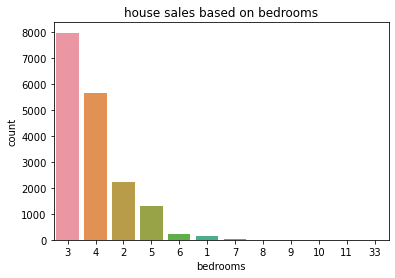

In [26]:
#home sales based on the number of bedrooms
sns.countplot(data.bedrooms,order=data['bedrooms'].value_counts().index).set(title = "house sales based on bedrooms")

[Text(0.5, 1.0, 'house sales based on condition')]

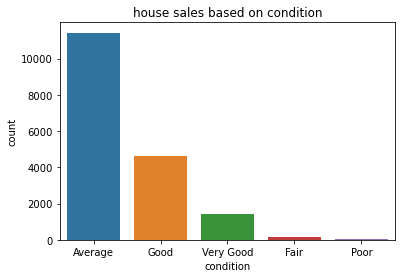

In [27]:
sns.countplot(data.condition,order=data['condition'].value_counts().index).set(title = "house sales based on condition")

[Text(0.5, 1.0, 'house sales based on bathrooms')]

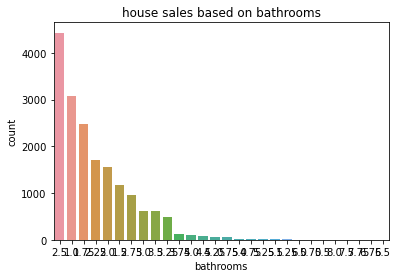

In [28]:
sns.countplot(data.bathrooms,order=data['bathrooms'].value_counts().index).set(title = "house sales based on bathrooms")

[Text(0.5, 1.0, 'house sales based on view')]

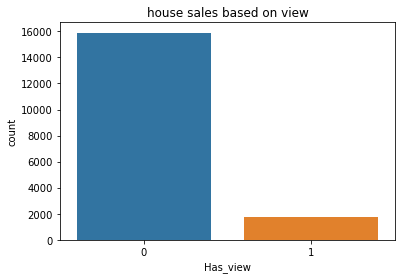

In [29]:
sns.countplot(data.Has_view,order=data['Has_view'].value_counts().index).set(title = "house sales based on view")

[Text(0.5, 1.0, 'house sales based on number of floors')]

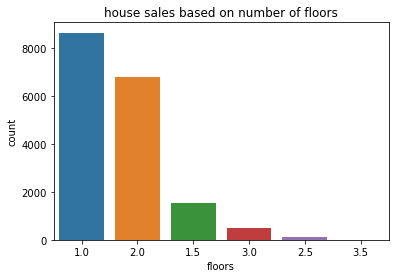

In [30]:
sns.countplot(data.floors,order=data['floors'].value_counts().index).set(title = "house sales based on number of floors")

[Text(0.5, 1.0, 'house sales based on grade')]

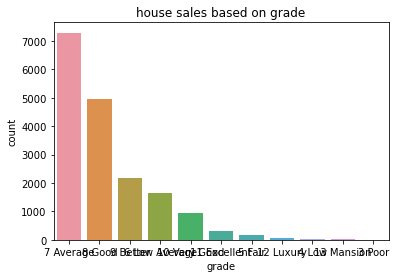

In [31]:
sns.countplot(data.grade,order=data['grade'].value_counts().index).set(title = "house sales based on grade")

### continuous variable visualizations

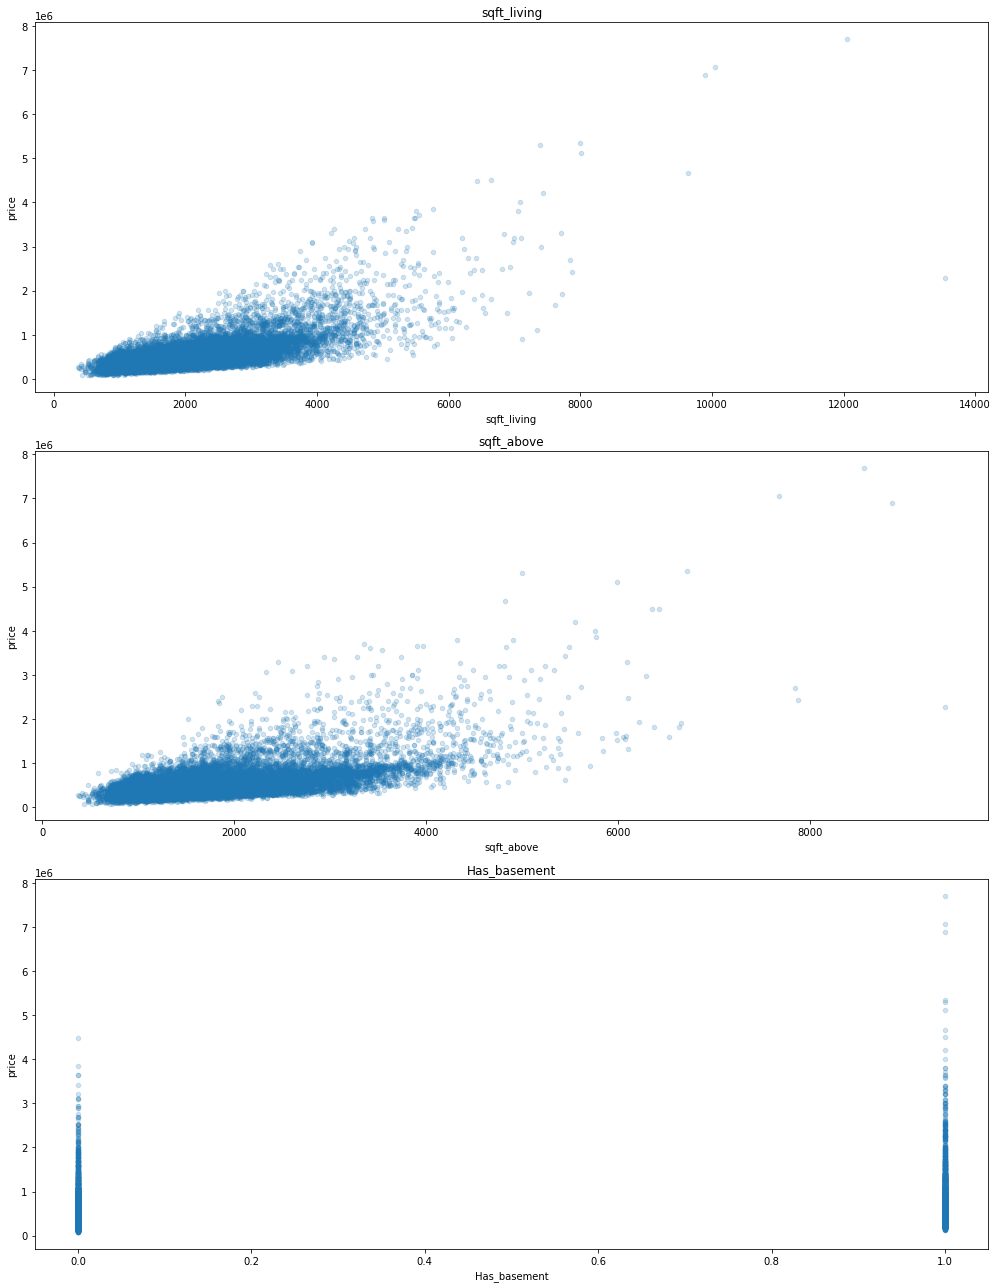

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,18))

for var, ax in zip(['sqft_living', 'sqft_above', 'Has_basement'], axes):
    data.plot(kind = 'scatter', x = var, y = 'price', ax = ax, alpha=0.2)
    
    ax.set_title(var)               
    
fig.tight_layout()


In [33]:
# fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
# plt.title("house prices by sqft_above")
# plt.xlabel('sqft_above')
# plt.ylabel('house prices')
# sns.barplot(y='sqft_above',x='price',data=data)

## visualization of the categorical variables

In [34]:
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)
# column = ['waterfront', 'Has_view', 'condition', 'grade', 'renovation_status']
# for ax, column in zip(axes.flatten(), data.columns):
#     ax.bar(data[column], data['price'] , label=column)
#     ax.set_title(f'Sale Price vs {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('price')

# fig.tight_layout()

## visualizing outliers for different data columns

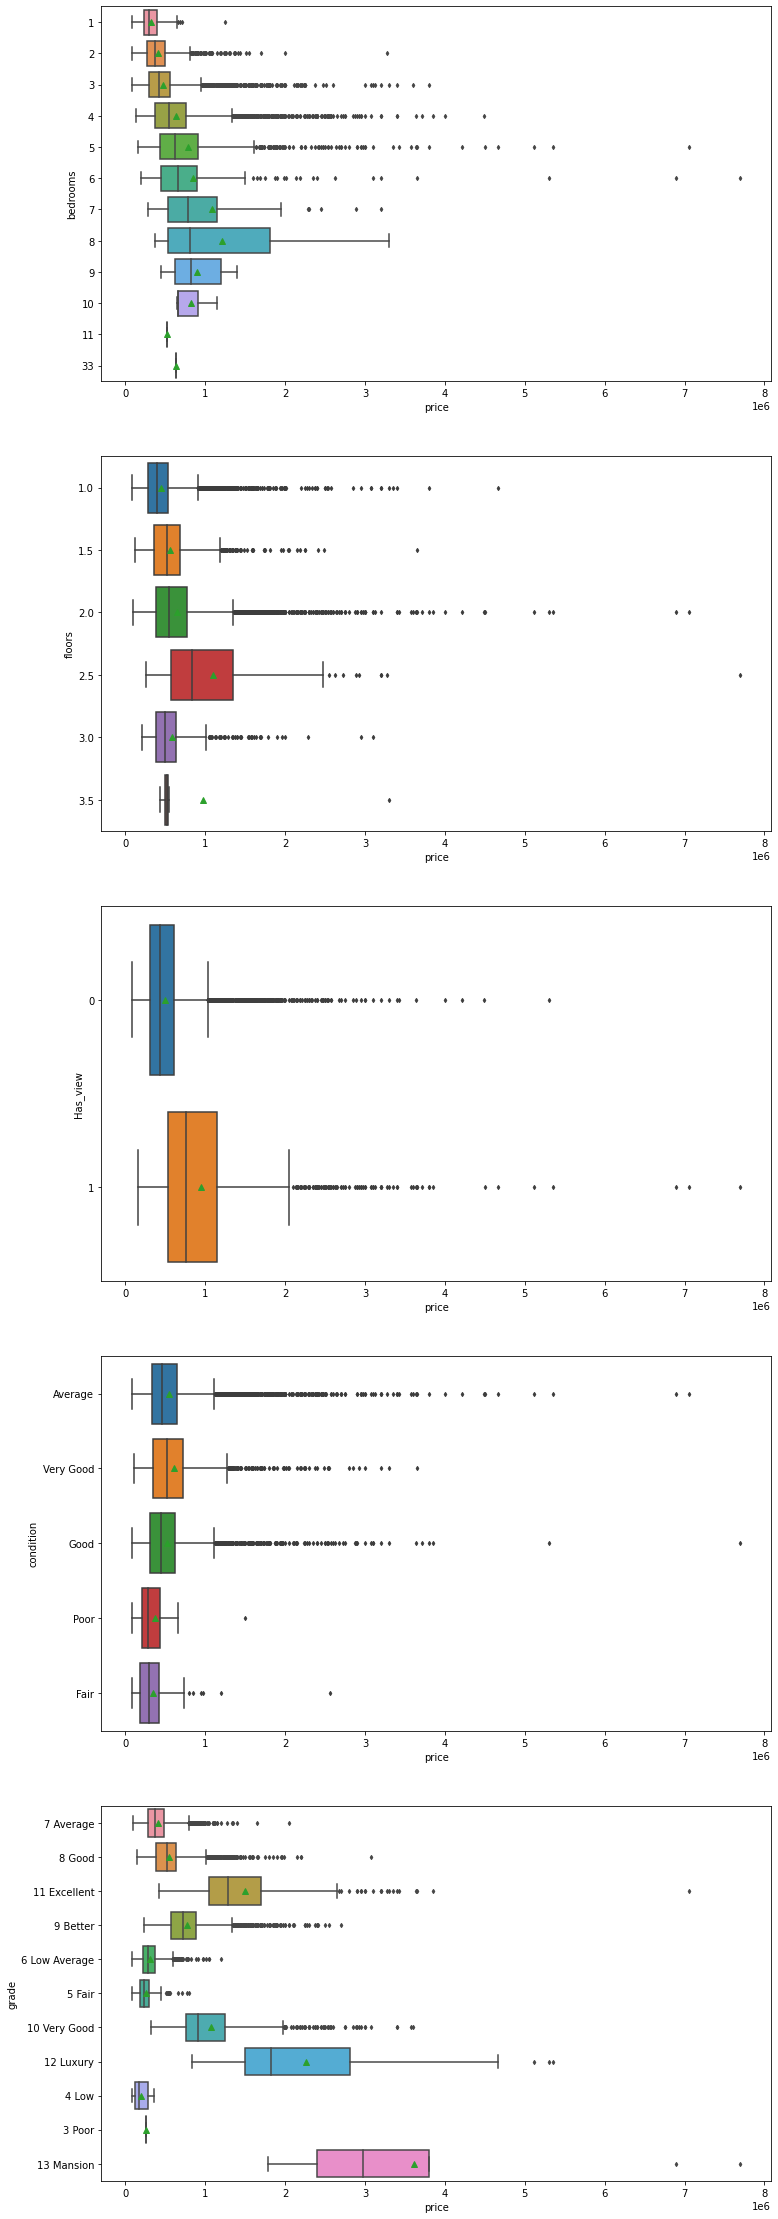

In [35]:
fig, axarr = plt.subplots(5, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'Has_view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

<AxesSubplot:xlabel='price'>

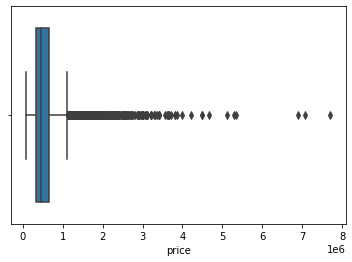

In [36]:
#price oultiers
sns.boxplot(x= data['price'])

<AxesSubplot:xlabel='sqft_living'>

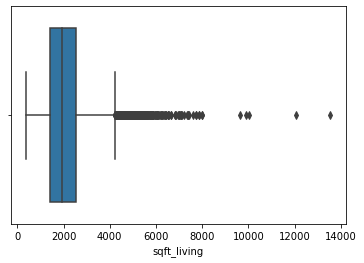

In [37]:
sns.boxplot(x= data['sqft_living'])

<AxesSubplot:xlabel='bedrooms'>

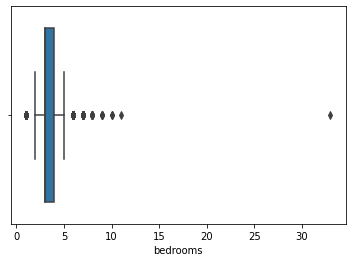

In [38]:
sns.boxplot(x= data['bedrooms'])

<AxesSubplot:xlabel='sqft_above'>

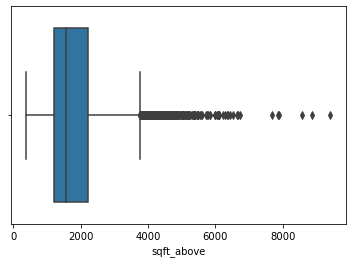

In [39]:
sns.boxplot(x= data['sqft_above'])

lets remove some price price outliers

<AxesSubplot:xlabel='price'>

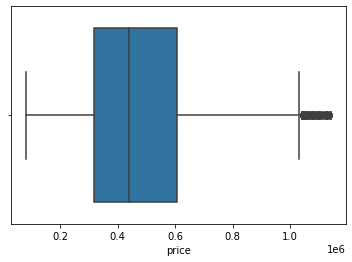

In [40]:
data = data.query('price < price.quantile(.95)')
sns.boxplot(x= data['price'])

## Exploring correlations

In [41]:
data_corrs = data.corr()
data_corrs

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,yr_built,renovation_status,Has_basement,Has_view
id,1.000000,0.005742,0.014085,0.019147,0.006561,0.029317,-0.002389,0.008249,0.023669,-0.015274,0.001904,0.014742
price,0.005742,1.000000,0.298421,0.453915,0.623682,0.267828,0.045610,0.529657,0.054334,0.089374,0.160794,0.236944
bedrooms,0.014085,0.298421,1.000000,0.489973,0.582915,0.155002,-0.029174,0.462594,0.157549,0.000329,0.143177,0.036275
bathrooms,0.019147,0.453915,0.489973,1.000000,0.714430,0.499740,-0.009336,0.636298,0.543948,0.024798,0.136062,0.085891
sqft_living,0.006561,0.623682,0.582915,0.714430,1.000000,0.337466,-0.004201,0.852259,0.351918,0.019796,0.174892,0.162970
floors,0.029317,0.267828,0.155002,0.499740,0.337466,1.000000,-0.007995,0.528026,0.508192,-0.005486,-0.281070,-0.028091
waterfront,-0.002389,0.045610,-0.029174,-0.009336,-0.004201,-0.007995,1.000000,-0.011194,-0.034099,0.058583,0.014617,0.175386
sqft_above,0.008249,0.529657,0.462594,0.636298,0.852259,0.528026,-0.011194,1.000000,0.460287,-0.003893,-0.277316,0.058804
yr_built,0.023669,0.054334,0.157549,0.543948,0.351918,0.508192,-0.034099,0.460287,1.000000,-0.219965,-0.167295,-0.075449
renovation_status,-0.015274,0.089374,0.000329,0.024798,0.019796,-0.005486,0.058583,-0.003893,-0.219965,1.000000,0.031965,0.052919


In [42]:
data_corr = data.corr()['price'].map(abs).sort_values(ascending = False)
data_corr


price                1.000000
sqft_living          0.623682
sqft_above           0.529657
bathrooms            0.453915
bedrooms             0.298421
floors               0.267828
Has_view             0.236944
Has_basement         0.160794
renovation_status    0.089374
yr_built             0.054334
waterfront           0.045610
id                   0.005742
Name: price, dtype: float64

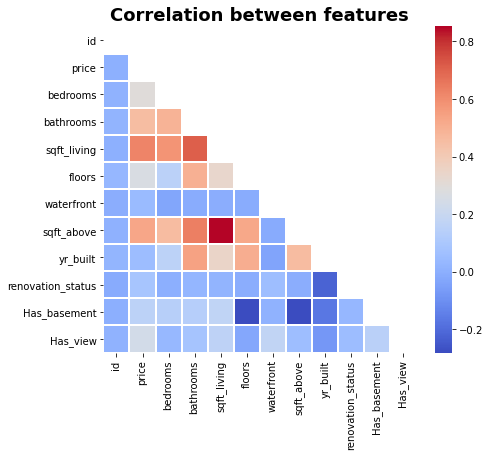

In [43]:
plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(data_corrs, dtype=bool))
sns.heatmap(data.corr(), cmap= 'coolwarm', mask= mask, linewidth= 1)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()


This table of correlations shows that the square feet of living space has the strongest correlation with sale price at 0.624, followed by square feet of living space above ground and number of bathrooms, at 0.531 and 0.455, respectively.. 

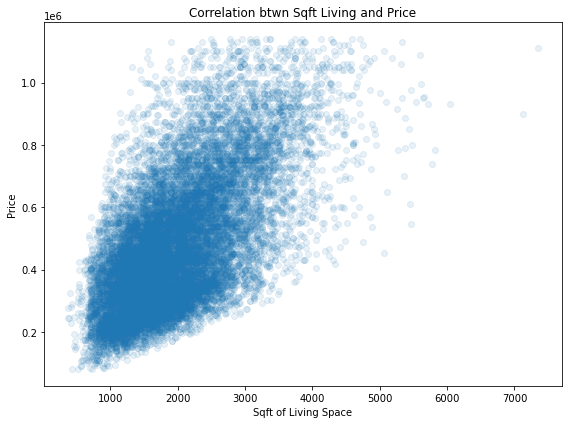

In [44]:
#visually inspect correlation between sqft_living and sale price
fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(data['sqft_living'],data['price'], alpha = .1)
ax.set_xlabel('Sqft of Living Space')
ax.set_ylabel('Price')
ax.set_title('Correlation btwn Sqft Living and Price')

plt.tight_layout()

#lets drop the sqft_above in order to enable us handle multicollinearity issues which might alter our interpretations

In [45]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,sqft_above,yr_built,renovation_status,Has_basement,Has_view
0,7129300520,221900.0,3,1.00,1180,1.0,0.0,Average,7 Average,1180,1955,0,0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0.0,Average,7 Average,2170,1951,1,1,0
3,2487200875,604000.0,4,3.00,1960,1.0,0.0,Very Good,7 Average,1050,1965,0,1,0
4,1954400510,510000.0,3,2.00,1680,1.0,0.0,Average,8 Good,1680,1987,0,0,0
6,1321400060,257500.0,3,2.25,1715,2.0,0.0,Average,7 Average,1715,1995,0,0,0


In [46]:
#data.drop(columns = ["sqft_above"])

### creating dummy variables

In [47]:
cond_dummies = pd.get_dummies(data['condition'], prefix = 'cond', drop_first = True)
grade_dummies = pd.get_dummies(data['grade'], prefix = 'grade', drop_first = True)

In [48]:
data = data.drop(['condition', 'grade'], axis = 1)
data = pd.concat([data, cond_dummies, grade_dummies], axis = 1)

In [49]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,yr_built,renovation_status,...,cond_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,1.0,0.0,1180,1955,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0.0,2170,1951,1,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960,1.0,0.0,1050,1965,0,...,1,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,1.0,0.0,1680,1987,0,...,0,0,0,0,0,0,0,0,1,0
6,1321400060,257500.0,3,2.25,1715,2.0,0.0,1715,1995,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
correlation_pairs = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
correlation_pairs['pairs'] = list(zip(correlation_pairs.level_0,correlation_pairs.level_1))
correlation_pairs.set_index(['pairs'], inplace = True)
correlation_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
correlation_pairs.columns = ['cc']
correlation_pairs.drop_duplicates(inplace=True)

# Filter for correlation coefficients less than 1 and greater than 0.75
correlation_pairs [(correlation_pairs .cc>.75) & (correlation_pairs .cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.852259


In [51]:
data["Has_basement"].nunique()

2

lets drop the sqft_above in order to enable us handle multicollinearity issues which might alter our interpretations

In [52]:
data.drop(columns = ["sqft_above"])

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,renovation_status,Has_basement,...,cond_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,3,1.00,1180,1.0,0.0,1955,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0.0,1951,1,1,...,0,0,0,0,0,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960,1.0,0.0,1965,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,3,2.00,1680,1.0,0.0,1987,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1321400060,257500.0,3,2.25,1715,2.0,0.0,1995,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,3.0,0.0,2009,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,4,2.50,2310,2.0,0.0,2014,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,402101.0,2,0.75,1020,2.0,0.0,2009,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,400000.0,3,2.50,1600,2.0,0.0,2004,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16699 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   16699 non-null  int64  
 1   price                16699 non-null  float64
 2   bedrooms             16699 non-null  int64  
 3   bathrooms            16699 non-null  float64
 4   sqft_living          16699 non-null  int64  
 5   floors               16699 non-null  float64
 6   waterfront           16699 non-null  float64
 7   sqft_above           16699 non-null  int64  
 8   yr_built             16699 non-null  int64  
 9   renovation_status    16699 non-null  int64  
 10  Has_basement         16699 non-null  int64  
 11  Has_view             16699 non-null  int64  
 12  cond_Fair            16699 non-null  uint8  
 13  cond_Good            16699 non-null  uint8  
 14  cond_Poor            16699 non-null  uint8  
 15  cond_Very Good       16699 non-null 

saving the data as csv to access it in the next notebook for modelling procedures

In [54]:
data.to_csv('data')